In [839]:
# !pip install pandas numpy seaborn matplotlib scipy scikit-learn


In [840]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats     #To draw the QQ plot
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")


In [841]:
df = sns.load_dataset('titanic')

In [842]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# Dropping Unnecessary columns

In [843]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [844]:
df.drop(columns=[ 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone','class'],inplace=True)

In [845]:
df.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C

In [846]:
df.shape

(891, 8)

# Exploratory data analysis

In [847]:
df.shape


(891, 8)

In [848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [849]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

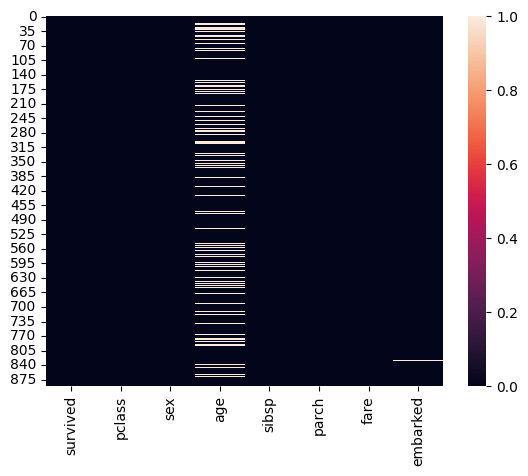

In [850]:
sns.heatmap(df.isnull())
plt.show()

In [851]:
print(df.isnull().sum())
print("--"*40)
print('Percentage of Null Values',(df.isnull().sum()/df.shape[0])*100)

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64
--------------------------------------------------------------------------------
Percentage of Null Values survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
dtype: float64


In [852]:
df['embarked'].mode()[0]

'S'

In [853]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### age columns consists of 177 Null values (i.e 19.5 %) and embarked column consist of 2 Null values (i.e 0.22 %)

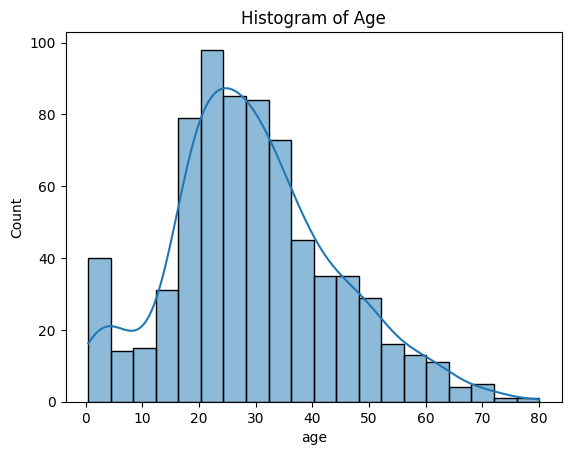

In [854]:
sns.histplot(data=df,x='age',kde=True)
plt.title('Histogram of Age')
plt.show()

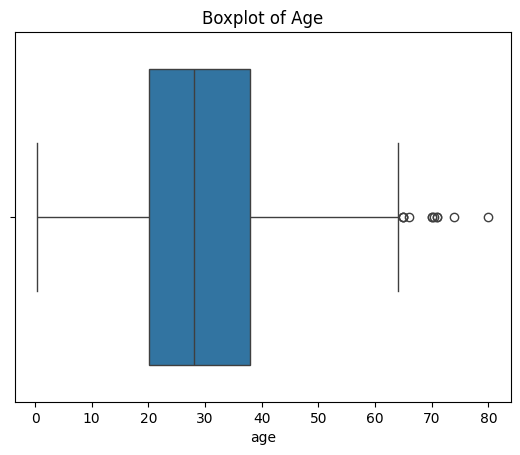

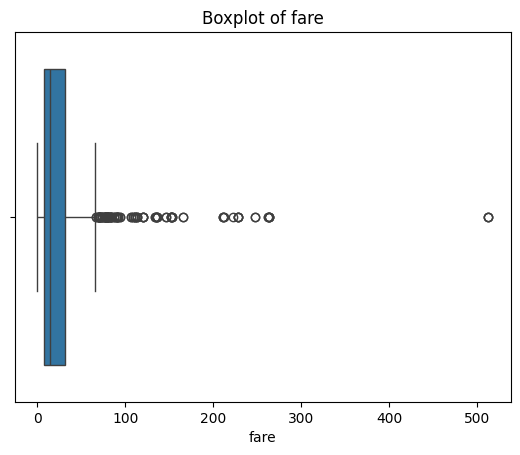

In [855]:
sns.boxplot(data=df,x='age')
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(data=df,x='fare')
plt.title('Boxplot of fare')
plt.show()



In [856]:
#Seperating Input features and Target variable
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

# x consist of following columns: 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class'
# y consist of following column: 'survived'

In [857]:
x

pclass     sex   age  sibsp  parch     fare embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]

# Train-test split

In [858]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.18)

In [859]:
x_train.isnull().sum()

pclass        0
sex           0
age         145
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [860]:
y_train['survived'].value_counts()

survived
0    453
1    277
Name: count, dtype: int64

In [861]:
x_train['embarked'].value_counts()

embarked
S    537
C    130
Q     61
Name: count, dtype: int64

In [862]:
x_train.isnull().sum()

pclass        0
sex           0
age         145
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

# Sampling for imbalanced dataset

In [863]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# x_train, y_train= rus.fit_resample(x_train, y_train)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
x_train, y_train= rus.fit_resample(x_train, y_train)


In [864]:
y_train['survived'].value_counts()

survived
1    453
0    453
Name: count, dtype: int64

## Column transformation to impute age and embarked column

In [865]:
# Custom function to apply backward fill in Embarked column
def bfill_embarked(X):
    X = pd.DataFrame(X)  # Convert to DataFrame to use pandas' bfill method
    X=X.fillna(method='bfill')
    return X.values  # Return as numpy array



In [866]:
#Column transformer for Imputing Age with mean and embarked with backward fill
impute_age_embarked = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(missing_values=np.nan, strategy='mean'), ['age']),
    ('embarked_bfill', FunctionTransformer(bfill_embarked, validate=False), ['embarked']),


], remainder='passthrough')

## AFter applying impute_age_embarked column transformer the order of column will be:
### 0.age    1.embarked 2.pclass    3.sex    4.sibsp    5.parch    6.fare

In [867]:
pipe = Pipeline([
    ('impute_age_embarked',impute_age_embarked)
])

In [868]:
x_train_transformed=pipe.fit_transform(x_train)
x_test_transformed=pipe.transform(x_test)

In [869]:
x_train_transformed=pd.DataFrame(x_train_transformed,columns=['age','embarked','pclass','sex','sibsp','parch','fare'])
x_test_transformed=pd.DataFrame(x_test_transformed,columns=['age','embarked','pclass','sex','sibsp','parch','fare'])

In [870]:
x_train_transformed

age embarked pclass     sex sibsp parch     fare
0    29.02782        S      1    male     0     0    26.55
1        39.0        S      2    male     0     0     13.0
2    29.02782        C      1  female     1     0  82.1708
3    29.02782        Q      3    male     0     0   8.4583
4        65.0        C      1    male     0     1  61.9792
..        ...      ...    ...     ...   ...   ...      ...
901       3.0        S      3    male     1     1     15.9
902      24.0        C      1  female     0     0     69.3
903      23.0        S      3  female     0     0     7.55
904       4.0        S      3  female     0     2   22.025
905  29.02782        Q      3  female     1     0     15.5

[906 rows x 7 columns]

In [871]:
x_train_transformed.isnull().sum()

age         0
embarked    0
pclass      0
sex         0
sibsp       0
parch       0
fare        0
dtype: int64

In [872]:
x_train_transformed['embarked'].value_counts()

embarked
S    654
C    173
Q     79
Name: count, dtype: int64

In [873]:
#  function to handle outlier detection based on IQR for 'age'
def outlier_detection(X, y):
    # Reset index to ensure that both X and non_outliers have the same index
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    q1 = np.percentile(X['age'], q=25)  # 25th percentile
    q3 = np.percentile(X['age'], q=75)  # 75th percentile
    iqr = q3 - q1
    lb = q1 - (1.5 * iqr)  # Lower bound for outliers
    ub = q3 + (1.5 * iqr)  # Upper bound for outliers

    print(f"Lower bound (lb): {lb}, Upper bound (ub): {ub}")

    # Filter rows based on outliers in 'age'
    non_outliers = (X['age'] >= lb) & (X['age'] <= ub)

    print(f"Number of rows before filtering: {X.shape[0]}")
    print(f"Number of rows after filtering: {X[non_outliers].shape[0]}")

    # Filter X and y based on outliers
    X_clean = X.loc[non_outliers].reset_index(drop=True)
    y_clean = y.loc[non_outliers].reset_index(drop=True)

    return X_clean, y_clean


#______________________________________________________________________________________
# function to handle outlier detection based on IQR for 'age' and 'fare'
# def outlier_detection(X, y):
#     # Reset index to ensure that both X and non_outliers have the same index
#     X = X.reset_index(drop=True)
#     y = y.reset_index(drop=True)

#     # Calculate IQR and bounds for outlier detection for 'age'
#     q1_age = np.percentile(X['age'], q=25)  # 25th percentile
#     q3_age = np.percentile(X['age'], q=75)  # 75th percentile
#     iqr_age = q3_age - q1_age
#     lb_age = q1_age - (1.5 * iqr_age)  # Lower bound for outliers in 'age'
#     ub_age = q3_age + (1.5 * iqr_age)  # Upper bound for outliers in 'age'

#     # Calculate IQR and bounds for outlier detection for 'fare'
#     q1_fare = np.percentile(X['fare'], q=25)  # 25th percentile
#     q3_fare = np.percentile(X['fare'], q=75)  # 75th percentile
#     iqr_fare = q3_fare - q1_fare
#     lb_fare = q1_fare - (1.5 * iqr_fare)  # Lower bound for outliers in 'fare'
#     ub_fare = q3_fare + (1.5 * iqr_fare)  # Upper bound for outliers in 'fare'

#     print(f"Age - Lower bound: {lb_age}, Upper bound: {ub_age}")
#     print(f"Fare - Lower bound: {lb_fare}, Upper bound: {ub_fare}")

#     # Filter rows based on outliers in 'age' and 'fare'
#     non_outliers = (X['age'] >= lb_age) & (X['age'] <= ub_age) & (X['fare'] >= lb_fare) & (X['fare'] <= ub_fare)

#     # Print the number of rows before and after filtering
#     print(f"Number of rows before filtering: {X.shape[0]}")
#     print(f"Number of rows after filtering: {X[non_outliers].shape[0]}")

#     # Filter X and y based on outliers
#     X_clean = X.loc[non_outliers].reset_index(drop=True)
#     y_clean = y.loc[non_outliers].reset_index(drop=True)

#     return X_clean, y_clean


In [874]:
x_train_transformed,y_train_transformed=outlier_detection(x_train_transformed,y_train)

Lower bound (lb): 2.5, Upper bound (ub): 54.5
Number of rows before filtering: 906
Number of rows after filtering: 831


In [875]:
x_test_transformed,y_test_transformed=outlier_detection(x_test_transformed,y_test)

Lower bound (lb): 1.0, Upper bound (ub): 57.0
Number of rows before filtering: 161
Number of rows after filtering: 152


# Feature Engineering:

# Combining parch and sibsp features to create new column




In [876]:
x_test_transformed['Relations']=x_test_transformed['sibsp']+x_test_transformed['parch']
x_train_transformed['Relations']=x_train_transformed['sibsp']+x_train_transformed['parch']
x_test_transformed.drop(columns=['sibsp','parch'],inplace=True)
x_train_transformed.drop(columns=['sibsp','parch'],inplace=True)

In [877]:
x_train_transformed

age embarked pclass     sex     fare Relations
0    29.02782        S      1    male    26.55         0
1        39.0        S      2    male     13.0         0
2    29.02782        C      1  female  82.1708         1
3    29.02782        Q      3    male   8.4583         0
4        23.0        S      2    male     10.5         0
..        ...      ...    ...     ...      ...       ...
826       3.0        S      3    male     15.9         2
827      24.0        C      1  female     69.3         0
828      23.0        S      3  female     7.55         0
829       4.0        S      3  female   22.025         2
830  29.02782        Q      3  female     15.5         1

[831 rows x 6 columns]

## Column transformation to handle categorical column:
## embarked,sex -> Nominal Encoding(One hot encoding)


In [878]:
encoding_ct = ColumnTransformer(transformers=[
     ('Ohe_encoder', OneHotEncoder(drop='first',sparse_output=False), [1,3]),
], remainder='passthrough')

# After applying encoding_ct column Transformer the order of the column is:
## 0.emb_q   1.emb_s  2.sex_m 3.age 4.pclass 6.fare 7.Relationship

## Column transformation to apply Standard scaler to Age column and Minmax sclaer to fare


In [879]:
scaler_ct = ColumnTransformer([
    ('standardscaler_age',StandardScaler(with_mean=False),[3]),
    ('powertransform_fare',PowerTransformer(standardize=True),[6])
], remainder='passthrough')

## Columns after applying scaler_fit
 'age','fare','embarked_q','embarked_s','sex_m','pclass','sibsp','parch'




In [880]:
pipe = Pipeline([
    ('encoding_ct',encoding_ct),
    # ('scaler_ct',scaler_ct),
])

In [881]:
pipe

Pipeline(steps=[('encoding_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 3])]))])

# Pipe line for logistic Regression


In [882]:
logistic_model = LogisticRegression(C=0.5994842503189409,class_weight=None,fit_intercept=True,l1_ratio=0.0,max_iter=100,multi_class='ovr',penalty='l2',solver='liblinear')
# Combine the two pipelines
logistic_pipe = Pipeline([
    ('preprocessing', pipe),                   # First pipeline (preprocessing steps)
    ('model', logistic_model)              # Second pipeline (logistic regression model)
])


logistic_pipe.fit(x_train_transformed,y_train_transformed)
y_predict_logistic = logistic_pipe.predict(x_test_transformed)

print("Accuracy of Logistic Regression: ",accuracy_score(y_test_transformed,y_predict_logistic))
crossval_logistic = cross_val_score(logistic_pipe, x_train_transformed, y_train_transformed, cv=10).mean()
print('cross validation score of Logistic Regression :',crossval_logistic)
print(classification_report(y_test_transformed, y_predict_logistic))


Accuracy of Logistic Regression:  0.7697368421052632
cross validation score of Logistic Regression : 0.7810097532989099
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        89
           1       0.72      0.73      0.72        63

    accuracy                           0.77       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.77      0.77      0.77       152



### Hyper paramater tunning for logistic regression using Grid Search CV


In [883]:
# Best paramaters for logistic Regression after applying Grid Search Cv

#  {'model__logistic_model__C': 0.5994842503189409,
#  'model__logistic_model__class_weight': None,
#  'model__logistic_model__fit_intercept': True,
#  'model__logistic_model__l1_ratio': 0.0,
#  'model__logistic_model__max_iter': 100,
#  'model__logistic_model__multi_class': 'ovr',
#  'model__logistic_model__penalty': 'l2',
#  'model__logistic_model__solver': 'liblinear'}
print(logistic_pipe.named_steps)

params = [{
    'model__logistic_model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__logistic_model__multi_class': ['ovr', 'multinomial', 'auto'],
    'model__logistic_model__C': np.logspace(-2, 2, 10),
    'model__logistic_model__max_iter': [100, 1000],
    'model__logistic_model__l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0],  # For elasticnet
    'model__logistic_model__solver': ['liblinear', 'saga'],  # Choose solvers based on your data size
    'model__logistic_model__class_weight': [None, 'balanced'],  # For handling class imbalance
    'model__logistic_model__fit_intercept': [True, False],  # Include or exclude intercept
}]

# logistic_grid = GridSearchCV(logistic_pipe, params, cv=5,verbose=True)
# logistic_grid.fit(x_train, y_train)

# print(logistic_grid.best_score_)
# print(logistic_grid.best_params_)


{'preprocessing': Pipeline(steps=[('encoding_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 3])]))]), 'model': LogisticRegression(C=0.5994842503189409, l1_ratio=0.0, multi_class='ovr',
                   solver='liblinear')}


# Pipeline for Decision Tree



In [884]:
decision_model = DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=4,max_features='log2',max_leaf_nodes=9,min_samples_leaf=1,min_samples_split=3)

decision_pipe = Pipeline([
    ('preprocessing', pipe),      # First pipeline (preprocessing steps)
    ('model', decision_model)              # Second pipeline (decision tree model)
])

decision_pipe.fit(x_train_transformed,y_train_transformed)
y_predict_decision = decision_pipe.predict(x_test_transformed)
print("Accuracy of Decision Tree: ",accuracy_score(y_test_transformed,y_predict_decision))
crossval_decision= cross_val_score(decision_pipe, x_train_transformed, y_train_transformed, cv=10).mean()
print('cross validation score of Decision Tree :',crossval_decision)
print(classification_report(y_test_transformed, y_predict_decision))


Accuracy of Decision Tree:  0.8157894736842105
cross validation score of Decision Tree : 0.779776247848537
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        89
           1       0.73      0.87      0.80        63

    accuracy                           0.82       152
   macro avg       0.81      0.82      0.81       152
weighted avg       0.83      0.82      0.82       152




### Hyper paramater tunning for decision Tree using Grid Search CV



In [885]:
# best paramater for decision tree
# {'model__decision_model__class_weight': None,
#  'model__decision_model__criterion': 'gini',
#  'model__decision_model__max_depth': 4,
#  'model__decision_model__max_features': 'log2',
#  'model__decision_model__max_leaf_nodes': 9,
#  'model__decision_model__min_samples_leaf': 1,
#  'model__decision_model__min_samples_split': 3}
print(decision_pipe.steps)
decision_params = [{
    'model__decision_model__criterion': ['gini', 'entropy'],
    'model__decision_model__max_depth': [None] + list(np.arange(1, 5)),
    'model__decision_model__min_samples_split': np.arange(2, 5),
    'model__decision_model__min_samples_leaf': np.arange(1, 5),
    'model__decision_model__max_features': ['auto', 'sqrt', 'log2'],
    'model__decision_model__class_weight': [None, 'balanced'],
    'model__decision_model__max_leaf_nodes': np.arange(5, 10),
}]
# decision_grid = GridSearchCV(decision_pipe, decision_params, cv=5,verbose=True)
# decision_grid.fit(x_train, y_train)
# decision_grid.best_score_
# decision_grid.best_params_

[('preprocessing', Pipeline(steps=[('encoding_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 3])]))])), ('model', DecisionTreeClassifier(max_depth=4, max_features='log2', max_leaf_nodes=9,
                       min_samples_split=3))]


# Pipeline fro SVC

In [886]:
svc_model = SVC(random_state=0,C= 12.915496650148826,
 gamma= 'scale',
 kernel= 'poly',
 max_iter= 1000)

# Combine the two pipelines
svc_pipe = Pipeline([
    ('preprocessing', pipe),      # First pipeline (preprocessing steps)
    ('model', svc_model)              # Second pipeline (SVC model)
])

svc_pipe.fit(x_train_transformed,y_train_transformed)
y_predict_svc = svc_pipe.predict(x_test_transformed)
print("Accuracy of svc: ",accuracy_score(y_test_transformed,y_predict_svc))
crossval_svc= cross_val_score(svc_pipe, x_train_transformed, y_train_transformed, cv=10).mean()
print('cross validation score of svc :',crossval_svc)
print(classification_report(y_test_transformed, y_predict_svc))


Accuracy of svc:  0.40789473684210525
cross validation score of svc : 0.5559667240390133
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        89
           1       0.41      0.97      0.58        63

    accuracy                           0.41       152
   macro avg       0.37      0.49      0.30       152
weighted avg       0.36      0.41      0.25       152



# Pipeline for RandomForest

In [887]:

randomforest_model = RandomForestClassifier(max_depth=4, random_state=0,criterion= 'gini')

# Combine the two pipelines
randomforest_pipe = Pipeline([
    ('preprocessing', pipe),      # First pipeline (preprocessing steps)
    ('model', randomforest_model)              # Second pipeline (Random Forest model)
])


randomforest_pipe.fit(x_train_transformed,y_train_transformed)
y_predict_randomforest = randomforest_pipe.predict(x_test_transformed)
print("Accuracy of Random forest: ",accuracy_score(y_test_transformed,y_predict_randomforest))
crossval_randomforest= cross_val_score(randomforest_pipe, x_train_transformed, y_train_transformed, cv=10).mean()
print('cross validation score of Random forest :',crossval_randomforest)
print(classification_report(y_test_transformed, y_predict_randomforest))


Accuracy of Random forest:  0.8289473684210527
cross validation score of Random forest : 0.8086775674125072
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        89
           1       0.78      0.81      0.80        63

    accuracy                           0.83       152
   macro avg       0.82      0.83      0.82       152
weighted avg       0.83      0.83      0.83       152



# Ensemble Learning Using Bagging Technique

In [888]:
bag = BaggingClassifier(RandomForestClassifier(),n_estimators=500,max_samples=0.8,bootstrap=True,max_features= 0.7,bootstrap_features=True,oob_score=True)
# Combine the two pipelines
bag_pipe = Pipeline([
    ('preprocessing', pipe),
    ('model',bag)
])

bag_pipe.fit(x_train_transformed,y_train_transformed)
y_prediction=bag_pipe.predict(x_test_transformed)
print("Accuracy of Bagging:",accuracy_score(y_test_transformed,y_prediction))
# crossval_bag= cross_val_score(bag_pipe, x_train_transformed, y_train_transformed, cv=10).mean()
# print('cross validation score of bagging :',crossval_bag)
print(classification_report(y_test_transformed, y_prediction))


Accuracy of Bagging: 0.8355263157894737
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        89
           1       0.80      0.81      0.80        63

    accuracy                           0.84       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.84      0.84      0.84       152



In [889]:
bag_pipe.named_steps

{'preprocessing': Pipeline(steps=[('encoding_ct',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('Ohe_encoder',
                                                   OneHotEncoder(drop='first',
                                                                 sparse_output=False),
                                                   [1, 3])]))]),
 'model': BaggingClassifier(bootstrap_features=True, estimator=RandomForestClassifier(),
                   max_features=0.7, max_samples=0.8, n_estimators=500,
                   oob_score=True)}

# Hyper paramater tunning using grid search cv

In [890]:
# best paramaters:
# {'model__bootstrap': True,
#  'model__max_features': 0.7,
#  'model__max_samples': 1.0,
#  'model__n_estimators': 500}

parameters = {
    'model__n_estimators': [200,500,600,800,1000],
    'model__max_samples': [0.5,0.6,0.7,0.8,1.0],
    'model__bootstrap' : [True,False],
    'model__max_features' : [0.5,0.7,0.8,1.0],
    'model__bootstrap_features' : [True,False]
    }
# search = GridSearchCV(bag_pipe, parameters, cv=5)
# search.fit(x_train_transformed,y_train_transformed)
# search.best_params_
# search.best_score_